# <center>Globex Case</center>
<center><font size="3">This is the analysis of the second case from the Data Science Challenges<br>
    Done by: <b>Walid Ismail (wismail@eg.ibm.com)</b></font></center><br>

# 0. Introduction
Globex is a large industrial company with presence in six continents. They produce large industrial products such as ships, power plants, engines, etc. The CFO is examining profitability for numerous projects around the world, starting with projects beginning in 2010. They believe that using data and analytics can help identify projects that may be risky and result in a loss of profit. Globex has compiled data on all completed projects with a start date of 2010 or later. Globex needs the following:

1. Determine the key predictors of a project’s “PROFIT_PLAN”.
2. Develop an actionable, innovative strategy for the client.
3. Prepare a deliverable that is clear and concise, outlining each of your key recommendations.


# 1. Get the Watson Studio project token to use it to access the dataset

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='01cb8ab3-b48d-441d-8d33-edc6caae425d', project_access_token='p-d36f9300425b2c63be8cd6c20d68a07ef91ec977')
pc = project.project_context

In [4]:
# Import main needed libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")

# 2. Load the data file

In [5]:
pd.set_option('display.width', 3000)
pd.set_option('display.max.columns', 500) # display up to 500 colums without "..." use horizontal scrolling instead
pd.set_option('display.max.rows', 50)

# Fetch the Customer file
my_file = project.get_file("Globex_Data_Set.csv")

# Read the EXCEl data file from the object storage into a pandas DataFrame
#my_file.seek(0)
globex_df = pd.read_csv(my_file)
print("\nNumber of projects: {}".format(len(globex_df)))
globex_df.head()


Number of projects: 500


,PROJ_CD_TFD,R1,R2,R3,R4,R5,R6,R7,PROJ_DURN,CNTRY_DFT,CNTRY,REGION,FTE_INT,FTE_CONTR,CC,CUST,INSUR_BEFORE_AMT,INSUR_AFTER_AMT,INSUR_AMT,TAX_RT,CAP_UTIL,GNT_INVEST,LIQ_RSK,DIM_CONSTR,IPI,CTRCT_AMT_PLAN,PROFIT_PLAN
0,2,1,2,3,4,5,3,10,273,0.224,10,4,10,5,11400,1,55000,40150,95150,0.04,0.98,375000,0.04,1100,91.9065,500000,624690
1,8,0,1,1,1,1,8,10,181,0.118,5,3,6,5,11600,1,312000,227760,539760,0.08,0.95,1846000,0.19,1900,91.9065,2600000,3172233
2,9,1,2,2,2,2,8,6,273,0.140,5,3,3,3,11200,3,300000,219000,519000,0.11,0.99,875000,0.17,300,91.9065,2500000,2511626
3,3,0,1,3,3,3,4,1,90,0.103,9,4,4,4,11200,5,506000,344080,850080,0.08,0.89,2116000,0.00,1400,91.9065,4600000,5238419
4,5,0,1,2,1,5,8,5,273,0.051,6,3,4,3,10400,4,60000,41400,101400,0.05,0.85,220000,0.12,2000,91.9065,500000,548199


# 3. Exploratory Data Analysis
Lets now look at some exploratory information about our dataset and the variables in it to get a flovor of its different aspects. We will look at:<br>
- Number of observations<br>
- Number of columns<br>
- Types of columns<br>
- Does our dataset has empty cells or not?
- Descriptive statistics for each variable

In [6]:
globex_df.shape # dimensions of data set

(500, 27)

In [7]:
globex_df.isnull().sum() # check if any cells have missing values

PROJ_CD_TFD         0
R1                  0
R2                  0
R3                  0
R4                  0
R5                  0
R6                  0
R7                  0
PROJ_DURN           0
CNTRY_DFT           0
CNTRY               0
REGION              0
FTE_INT             0
FTE_CONTR           0
CC                  0
CUST                0
INSUR_BEFORE_AMT    0
INSUR_AFTER_AMT     0
INSUR_AMT           0
TAX_RT              0
CAP_UTIL            0
GNT_INVEST          0
LIQ_RSK             0
DIM_CONSTR          0
IPI                 0
CTRCT_AMT_PLAN      0
PROFIT_PLAN         0
dtype: int64

In [8]:
globex_df.info() # check data type of each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
PROJ_CD_TFD         500 non-null int64
R1                  500 non-null int64
R2                  500 non-null int64
R3                  500 non-null int64
R4                  500 non-null int64
R5                  500 non-null int64
R6                  500 non-null int64
R7                  500 non-null int64
PROJ_DURN           500 non-null int64
CNTRY_DFT           500 non-null float64
CNTRY               500 non-null int64
REGION              500 non-null int64
FTE_INT             500 non-null int64
FTE_CONTR           500 non-null int64
CC                  500 non-null int64
CUST                500 non-null int64
INSUR_BEFORE_AMT    500 non-null int64
INSUR_AFTER_AMT     500 non-null int64
INSUR_AMT           500 non-null int64
TAX_RT              500 non-null float64
CAP_UTIL            500 non-null float64
GNT_INVEST          500 non-null int64
LIQ_RSK             500 non-nul

In [9]:
pd.set_option('display.float_format','{:,.2f}'.format)
globex_df.describe() # view statisical measures of variables

,PROJ_CD_TFD,R1,R2,R3,R4,R5,R6,R7,PROJ_DURN,CNTRY_DFT,CNTRY,REGION,FTE_INT,FTE_CONTR,CC,CUST,INSUR_BEFORE_AMT,INSUR_AFTER_AMT,INSUR_AMT,TAX_RT,CAP_UTIL,GNT_INVEST,LIQ_RSK,DIM_CONSTR,IPI,CTRCT_AMT_PLAN,PROFIT_PLAN
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,4.49,0.51,1.50,2.05,2.58,3.09,5.56,5.50,222.38,0.10,5.50,2.62,5.43,3.51,"11,006.00",3.09,"254,882.00","179,113.62","433,995.62",0.07,0.83,"1,322,450.00",0.10,"1,056.20",99.67,"2,550,600.00","2,972,775.20"
std,2.97,0.50,0.50,0.78,1.15,1.40,2.84,2.86,92.93,0.03,2.73,0.97,2.87,1.14,588.09,1.40,"150,431.76","106,380.56","256,565.80",0.03,0.11,"897,901.16",0.06,585.34,3.88,"1,431,586.01","1,699,158.93"
min,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.05,1.00,1.00,1.00,2.00,"10,100.00",1.00,"8,000.00","5,360.00","13,360.00",0.03,0.65,"30,000.00",0.00,100.00,91.91,"100,000.00","102,733.00"
25%,2.00,0.00,1.00,1.00,2.00,2.00,3.00,3.00,181.00,0.08,3.00,2.00,3.00,2.00,"10,500.00",2.00,"121,000.00","87,712.50","210,000.00",0.05,0.73,"567,000.00",0.04,500.00,96.50,"1,300,000.00","1,486,095.50"
50%,4.00,1.00,2.00,2.00,3.00,3.00,6.00,6.00,184.00,0.10,6.00,3.00,5.00,3.00,"11,000.00",3.00,"250,000.00","175,200.00","426,260.00",0.07,0.82,"1,184,500.00",0.09,"1,000.00",99.96,"2,600,000.00","3,056,513.50"
75%,7.00,1.00,2.00,3.00,4.00,4.00,8.00,8.00,275.00,0.12,8.00,3.00,8.00,5.00,"11,500.00",4.00,"370,000.00","257,800.00","629,250.00",0.10,0.92,"1,923,750.00",0.15,"1,600.00",102.46,"3,800,000.00","4,343,528.75"
max,9.00,1.00,2.00,3.00,4.00,5.00,10.00,10.00,366.00,0.22,10.00,4.00,10.00,5.00,"12,000.00",5.00,"600,000.00","438,000.00","1,038,000.00",0.12,1.00,"3,950,000.00",0.20,"2,000.00",106.69,"5,000,000.00","6,497,434.00"


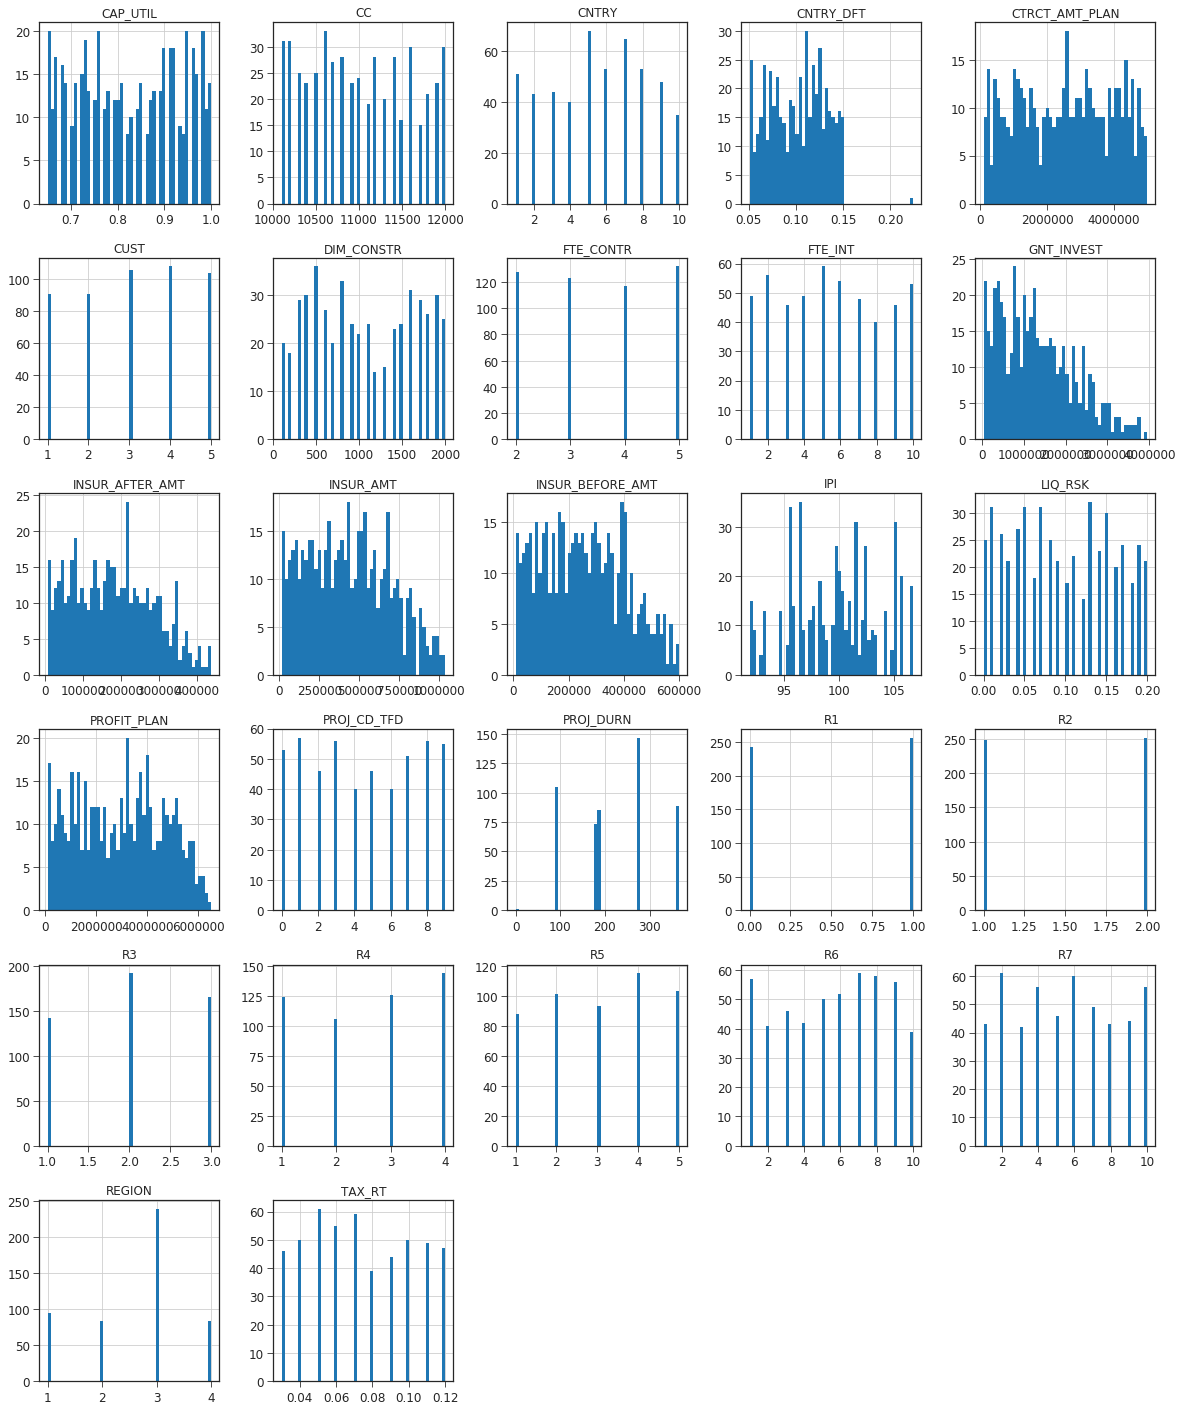

In [10]:
font = {'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rc('axes', titlesize=12)     # fontsize of the axes title

globex_df.hist(bins=50, figsize=(20,25));

Text(0.5,0.92,'PROFIT_PLAN against all discrete numeric variables')

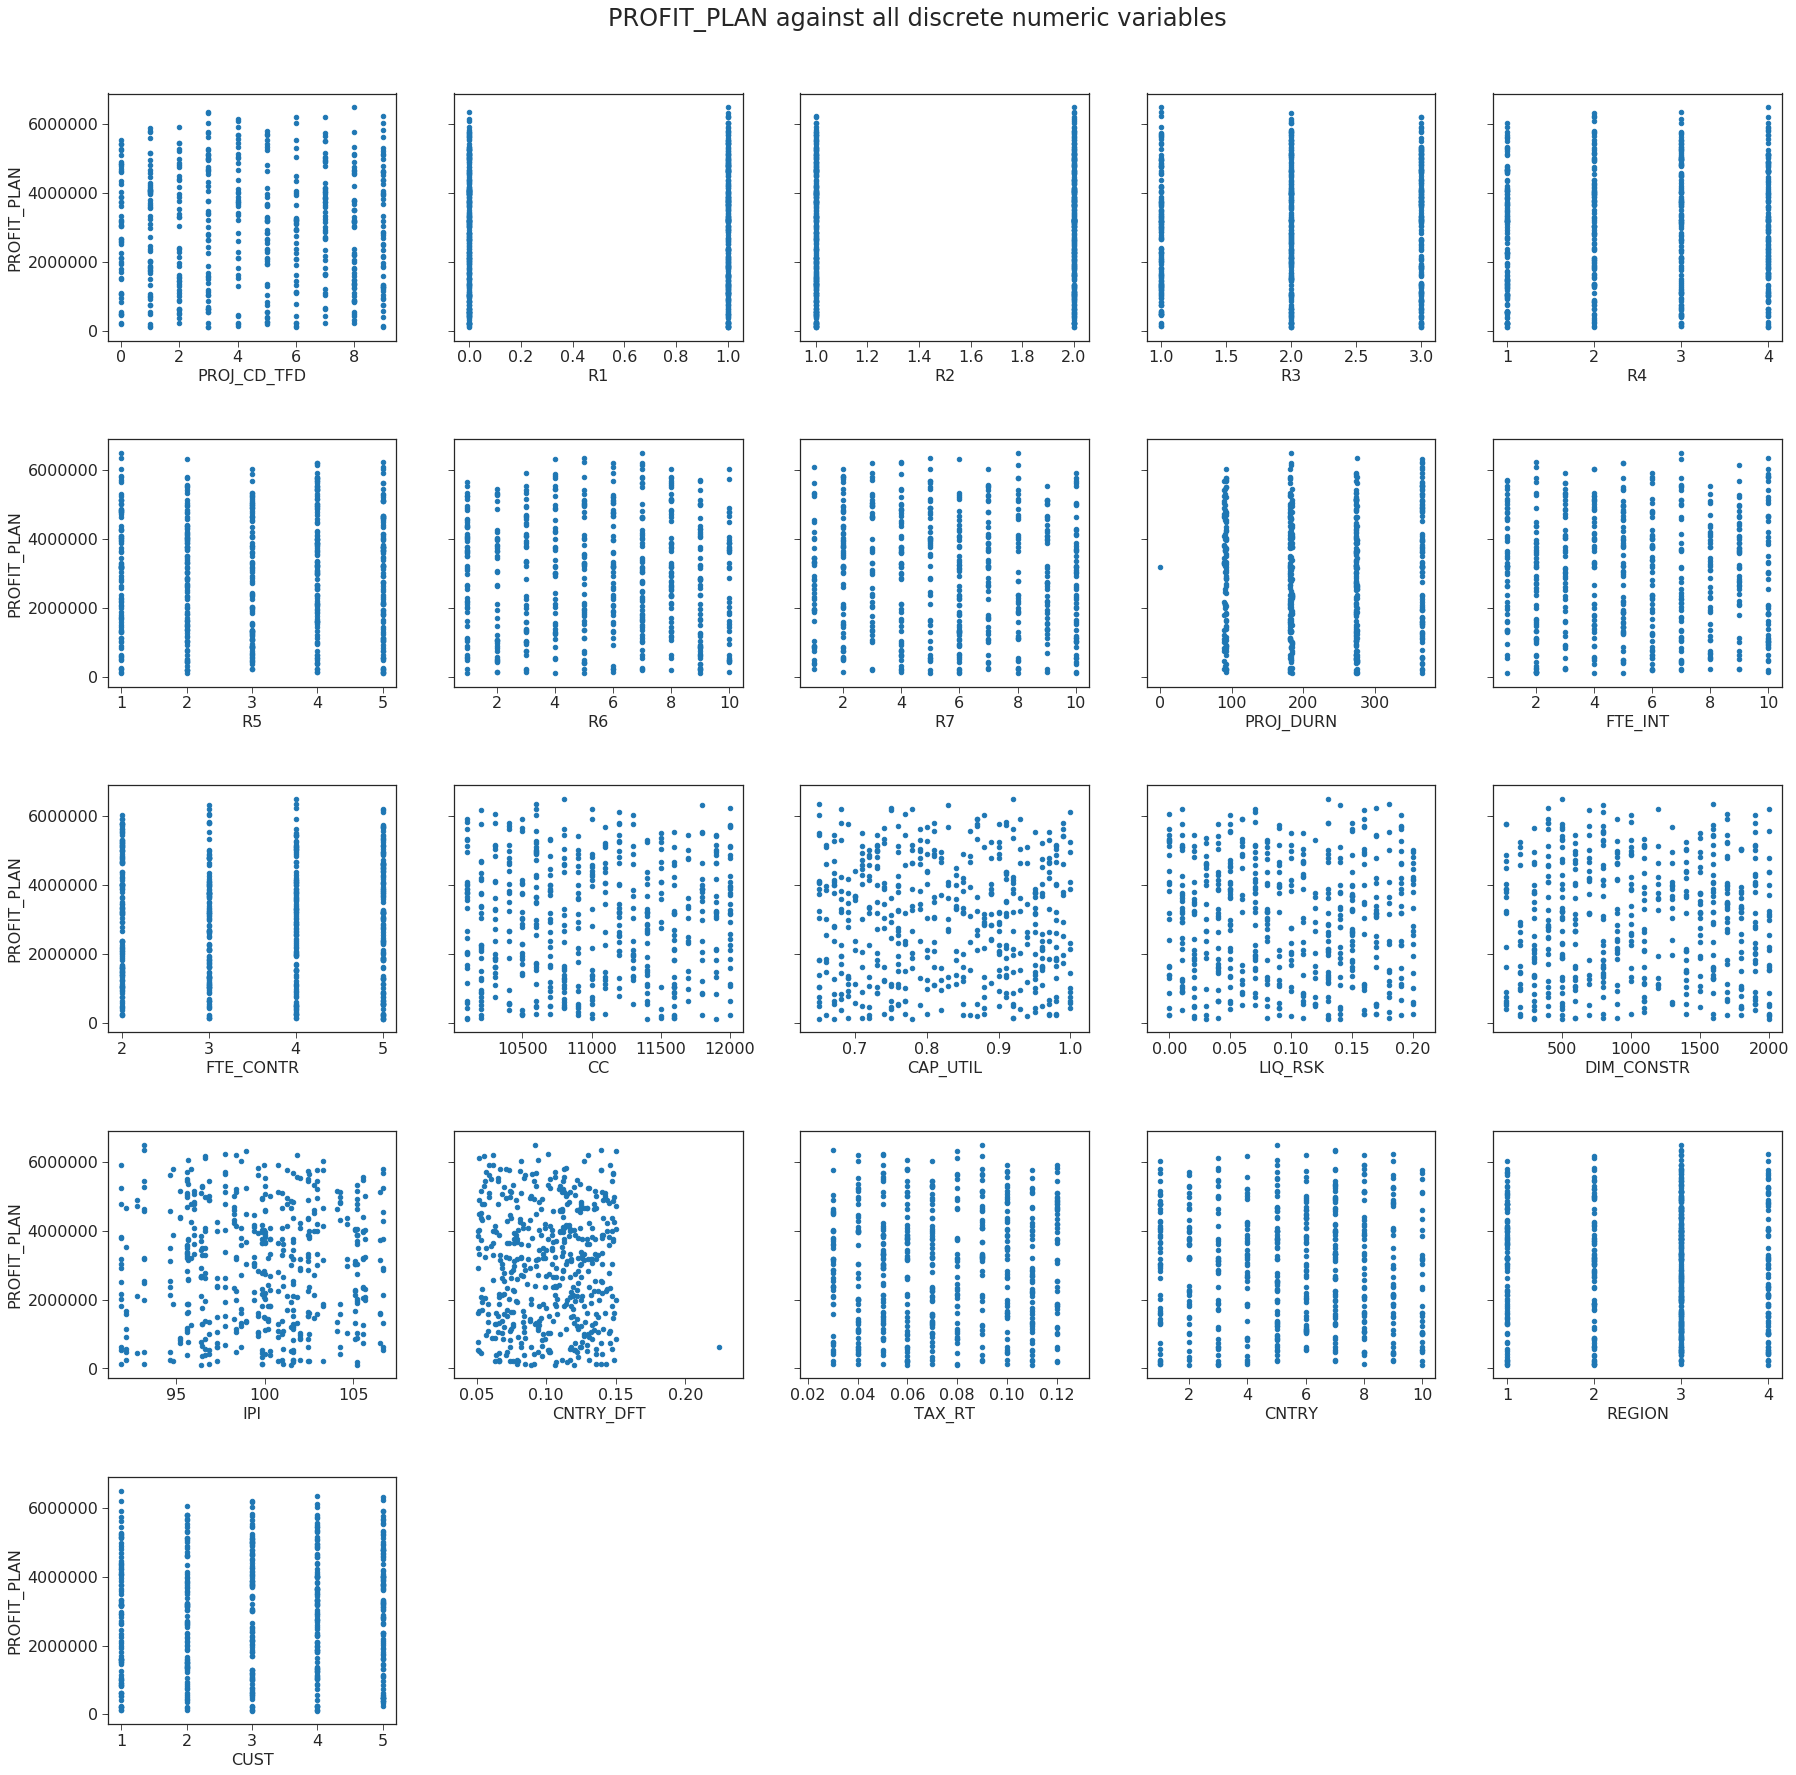

In [41]:
# Create scatter plot of numeric variables against PROFIT_PLAN

font = {'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

categorical_features = ['PROJ_CD_TFD', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 
                        'PROJ_DURN', 'FTE_INT', 'FTE_CONTR', 'CC', 
                        'CAP_UTIL', 'LIQ_RSK', 'DIM_CONSTR', 'IPI', "CNTRY_DFT", 
                        'TAX_RT', 'CNTRY', 'REGION', 'CUST']

num = len(categorical_features)

fig_columns = 5
fig_rows = int(num / fig_columns) + int(num % fig_columns > 0)

fig, axs = plt.subplots(fig_rows, fig_columns, sharex=False, sharey=True, figsize=(30,30))
plt.subplots_adjust(hspace=0.4)

for i, feat in enumerate(categorical_features):
    ax = globex_df.plot(kind='scatter', x=feat, y='PROFIT_PLAN', ax = axs[int(i/fig_columns), int(i%fig_columns)])
    ax.set_title('')
    fig2 = ax.get_figure()
    fig2.suptitle('')
     
for j in range(i+1, fig_columns*fig_rows):
    fig.delaxes(axs[int(j/fig_columns), int(j%fig_columns)])
    
fig.suptitle('PROFIT_PLAN against all discrete numeric variables', fontsize=24, y=0.92)

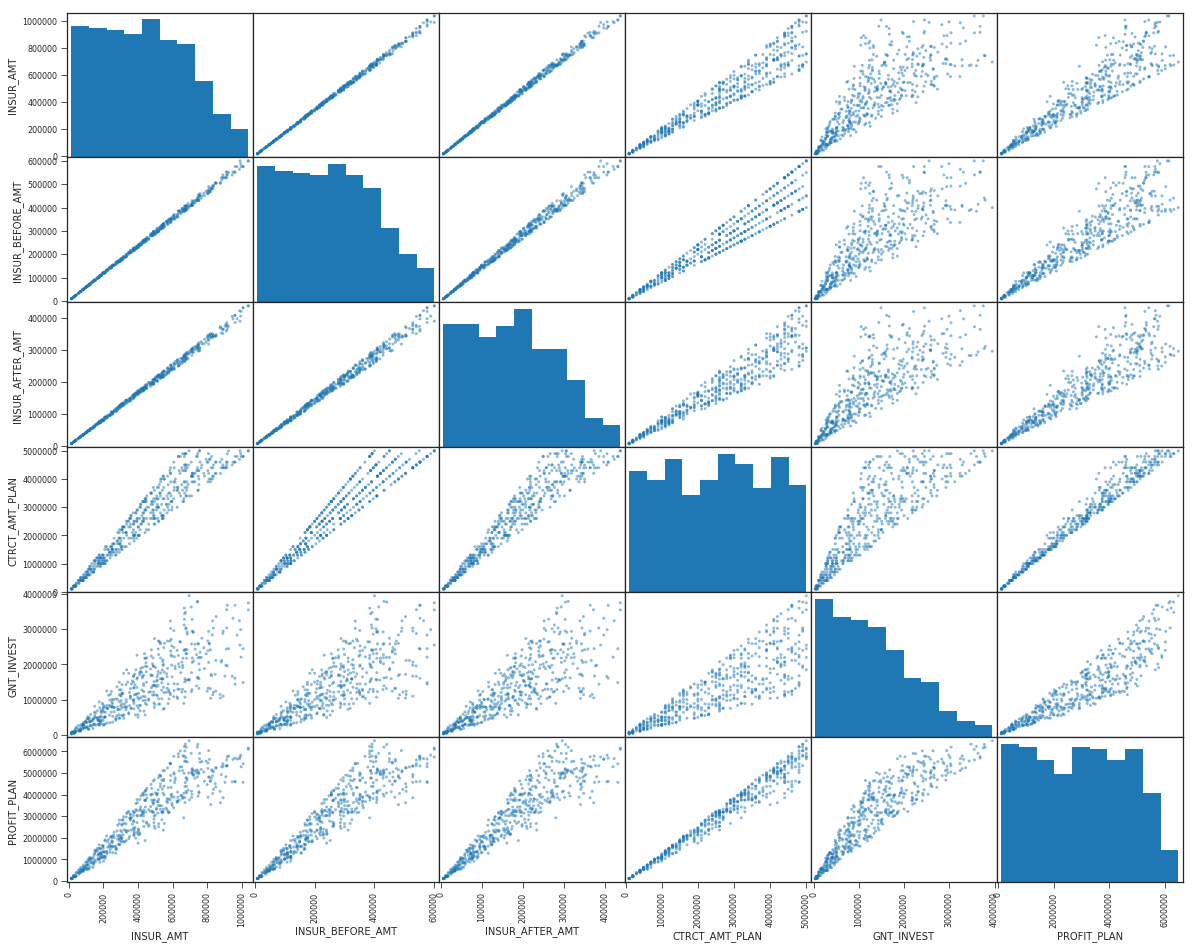

In [40]:
font = {'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

from pandas.plotting import scatter_matrix
attributes = ["INSUR_AMT", "INSUR_BEFORE_AMT", "INSUR_AFTER_AMT", "CTRCT_AMT_PLAN", "GNT_INVEST", "PROFIT_PLAN"]
scatter_matrix(globex_df[attributes], figsize=(20, 16));

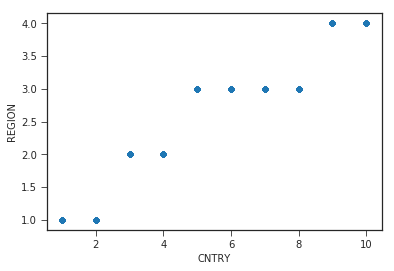

In [15]:
globex_df.plot(kind='scatter', x='CNTRY', y='REGION')

From our data visual data inspection above we can observe the following about the variables:<br>
- We have 27 attribuites in our dataset (26 possible features and one target).<br>
- All attributes are in numeric format.<br>
- Since Globex is seeking information on key predictors for <b>PROFIT_PLAN</b>, then this will be our target variable for this analysis.
- We have <b>5</b> numeric variables that are continious in nature <b>(INSUR_BEFORE_AMT, INSUR_AFTER_AMT, INSUR_AMT, GNT_INVEST, CTRCT_AMT_PLAN)</b>. These variables will require scaling before they are used in modeling.<br>
- We have <b>21</b> numeric variables <b>(PROJ_CD_TFD, R1, R2, R3, R4, R5, R6, R7, PROJ_DURN, FTE_INT, FTE_CONTR, CNTRY_DFT, CC, TAX_RT, CAP_UTIL, LIQ_RSK, DIM_CONSTR, IPI, CNTRY, REGION, CUST)</b> that are discrete. Some may need to be tranformed to nominal variables of values (0,1) before they are used in modeling.<br>
- There appears to be a strong +ve correlation between the 5 numeric attributes <b>INSUR_BEFORE_AMT, INSUR_AFTER_AMT, INSUR_AMT, GNT_INVEST, CTRCT_AMT_PLAN</b> and each other and between them and the target <b>PROFIT_PLAN</b> so these are candidate predictors
- There appears to be no linear correlation between PROFIT_PLAN and any of the twenty one discrete numeric variables.
- Nearly half the projects are in REGION=3 to which 4 of the CNRTYs are allocated

# 5. Feature Selection
We are going to use several methods to try and discover the features that will be strong predictors for customer churn. Specifically we will try the following techniques:

- <b>Correlations</b>: this will help identify features pairs that are strongly correlated with each other so that we can remove one feature of them. Also correlation will identify numeric features that are highly correlated with the target variable to select as predictors for modeling
- <b>Box Plots</b> help us visualize the relationship between discrete variables and PROFIT_PLAN to see if there is variation in PROFIT_PLAN as a result of change in values for each of the features. This should help us identify which features qualify as a predictors for PROFIT_PLAN.
- <b>SelectKBest method</b>: this is a scikit learn object that ranks a list of features according to their predictice impact by assigning a score to each feature

## 5.1 Correlations
Now we check the Pearsom correlation between the continious features to see if any of the features pairs are highly correlated and as a result we can exclude one of the features of the pairs

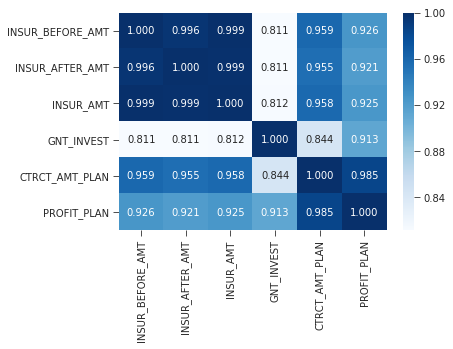

In [34]:
#check for correlations between numeric features. Rule, if two features that are highly correlated one should be dropped
# Does scaling make a difference in result ???? No, no need to scale features before running corr(), you will get the same scores. Try it yourself!

font = {'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

numeric_features = ['INSUR_BEFORE_AMT', 'INSUR_AFTER_AMT', 'INSUR_AMT', 'GNT_INVEST', 'CTRCT_AMT_PLAN', 'PROFIT_PLAN']

#plt.style.use('default')
plt.figure(figsize=(6, 4))
sns.heatmap(globex_df[numeric_features].corr(),  cmap="Blues", annot=True, fmt=".3f")

- The heat map above shows a very strong correlation of 0.99 to 1.00 between <b>INSUR_BEFORE_AMT, INSUR_AFTER_AMT, INSUR_AMT</b> and each other and between each of them and the target <b>PROFIT_PLAN</b> so we can select one of them to use as a predictor. We shall select <b>INSUR_AMT</b> since it is the sum of both.
- There is also a strong +ve correlation <b>GNT_INVEST</b> and the target variable so shall select it as a predictor for modeling as well.
- There is also a very strong +ve correlation <b>CTRCT_AMT_PLAN</b> and the target variable so shall select it as a predictor for modeling as well.
- There is a strong +ve correlation between <b>INSUR_AMT</b> and <b>CTRCT_AMT_PLAN</b> of 0.95 so we shall evaluate how including one of them vs both affects our model performance.

## 5.2 Box plots to compare categorical variables against the target variables
Let us check the 21 dsicrete numeric features that we have in the dataset against <b>PROFIT_PLAN</b>.

Text(0.5,0.95,'PROFIT_PLAN grouped by different discrete variables')

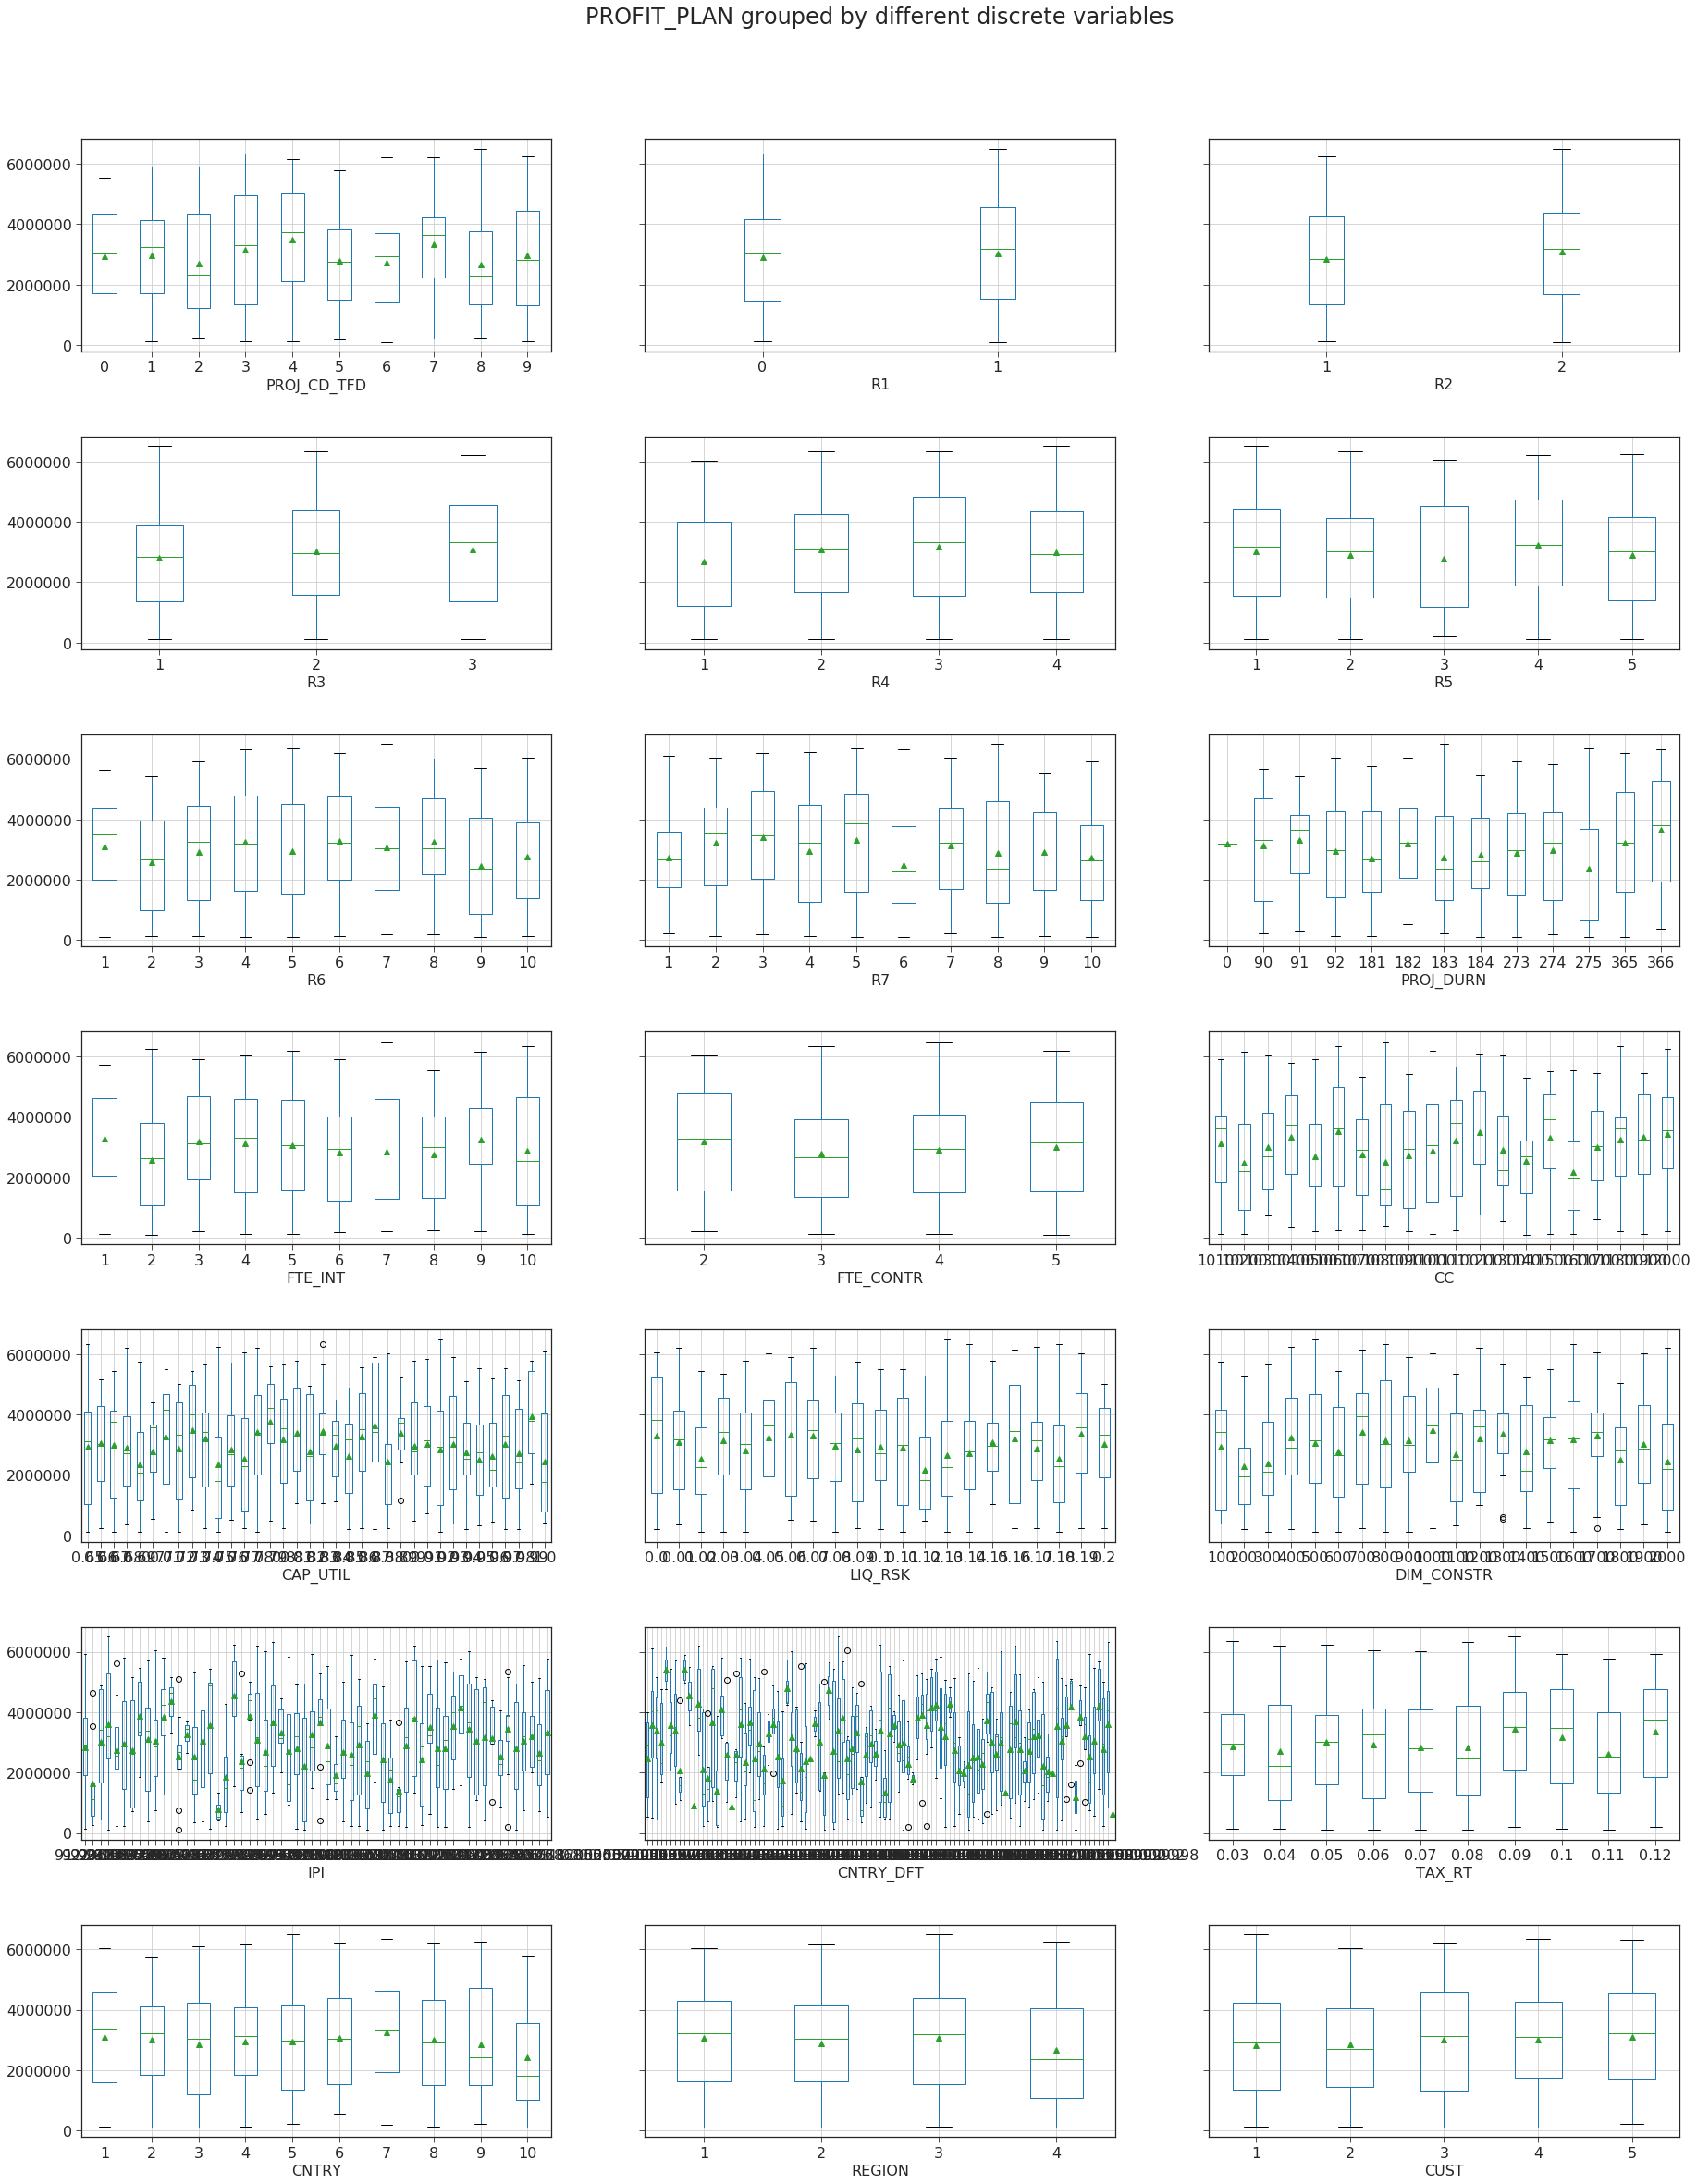

In [59]:
target = 'PROFIT_PLAN'

font = {'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

num = len(categorical_features)

fig_columns = 3
fig_rows = int(num / fig_columns) + int(num % fig_columns > 0)

fig, axs = plt.subplots(fig_rows, fig_columns, sharex=False, sharey=True, figsize=(30,40))
plt.subplots_adjust(hspace=0.4)

for i, feat in enumerate(categorical_features):
    ax = globex_df.boxplot(target, by=categorical_features[i], ax = axs[int(i/fig_columns), int(i%fig_columns)], showmeans=True)
    ax.set_title('')
    fig2 = ax.get_figure()
    fig2.suptitle('')
     
for j in range(i+1, num):
    fig.delaxes(axs[int(j/fig_columns), int(j%fig_columns)])
    
fig.suptitle('PROFIT_PLAN grouped by different discrete variables', fontsize=24, y=0.95)

The cross tabulation above provides the following information about the relationship between each of the nominal features and churn:
<ul>
    <li>Each of the features <b>marital, gender, tollfree, multline, callid, confer</b> have the same distribution whether they are 0 or 1 on customer churn so we can conclude that they will be <b>weak</b> predictors for customer churn &#x274C;</li>
    <li>Each of the features <b>equip, internet, ebill</b> have same distribution when they are 0 vs 1 on customer churn so we should take only one of them and use as a predictor. We shall select <b>equip</b></li>
    <li>Each of the features <b>wireless, voice, pager</b> have same distribution when they are 0 vs 1 on customer churn so we should take only one of them and use as a predictor. We shall select <b>wireless</b></li>
    <li><b>Callcard</b> havs an opposite distribution to all other nominal features where churn decreases as customer buy callcards. Accordingly, we shall select <b>callcard</b> as a predictor</li>       
</ul>

## 5.5 SelectKBest Method
SelectKBest is an object from Scikit Learn library that we can used for automatic feature selection. SelectKBest ranks all features based on their importance as predictors for the target variable using different statistical methods. We use it here as a validation of our selected features.

In [44]:
# Feature Extraction with Univariate Statistical Tests
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Does scaling make a difference in result ???? No, no need to scale features before running SelectKBest(), you will get the same scores. Try it yourself!

features_to_test = numeric_features + categorical_features

X = globex_df[features_to_test]
Y = globex_df[target]

# feature extraction
selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(X, Y)

#scores = -np.log10(selector.pvalues_)
scores = selector.scores_

# summarize scores
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format
scored_features = pd.DataFrame({'Feature': features_to_test, 'Score' : scores})
scored_features.sort_values(by = 'Score', ascending=False, inplace=True)
scored_features = scored_features.reset_index(drop=True)
scored_features.head(10)

#features = fit.transform(X) # get the array of observations for top 5 features, NICE!!
#print(features)

,Feature,Score
0,CTRCT_AMT_PLAN,15898.227
1,INSUR_BEFORE_AMT,3004.314
2,INSUR_AMT,2950.809
3,INSUR_AFTER_AMT,2789.868
4,GNT_INVEST,2481.681
5,R2,2.260
6,R4,2.240
7,R3,1.972
8,TAX_RT,1.818
9,R7,1.722


In [ ]:
# # 5.6 ANOVA Test
# import statsmodels.api as sm

# X = globex_df['R4']
# y = globex_df[target]

# model = sm.OLS(y, X)
# results = model.fit()
# print(results.summary())

# # 5.7 Chi-Squared Test
# import scipy.stats as stats
# tab = pd.crosstab(globex_df['R4'], globex_df['R6'])
# print(tab)
# print(stats.chi2_contingency(tab))

# # Feature Extraction with PCA
# from sklearn.decomposition import PCA
# X = globex_df.drop(target, axis=1, inplace=False)
# # feature extraction
# pca = PCA(n_components=8)
# fit = pca.fit(X)
# # summarize components
# print("Explained Variance: ",  fit.explained_variance_ratio_)
# print(fit.components_)

# X_Transform = pca.transform(X)

## 5.6 Selected Features
Based on the analysis above we have identified the following features as predictors for <b>PROFIT_PLAN</b> to be used in our modeling:<br>
- 1
- 2
- 3
- 4
- 5
- 6
- 7
- 8
- 9

# 6. Modeling
In the section we will focus finding the best model in order to predict customer churn for WW Communications. Since <b>churn</b> is a nominal variable (0,1) then our problem is mainly a classification problem. We will try different classification models to see which one yields the highest training accuracy, then we will fine tune our most accurate model in order to arrive at the bet testing accuracy.

## 6.0 Transform Categorical Variables to Nominal Features

In [61]:
selected_features = ['GNT_INVEST', 'CTRCT_AMT_PLAN', 'INSUR_AMT']

globex_df2 = globex_df[selected_features + [target]]
#globex_df2 = pd.get_dummies(globex_df2, columns = selected_categorical_features)
globex_df2

,GNT_INVEST,CTRCT_AMT_PLAN,INSUR_AMT,PROJ_CD_TFD,R1,R2,R3,R4,R5,R6,R7,PROJ_DURN,FTE_INT,FTE_CONTR,CC,CAP_UTIL,LIQ_RSK,DIM_CONSTR,IPI,CNTRY_DFT,TAX_RT,CNTRY,REGION,CUST,PROFIT_PLAN
0,375000,500000,95150,2,1,2,3,4,5,3,10,273,10,5,11400,0.980,0.040,1100,91.906,0.224,0.040,10,4,1,624690
1,1846000,2600000,539760,8,0,1,1,1,1,8,10,181,6,5,11600,0.950,0.190,1900,91.906,0.118,0.080,5,3,1,3172233
2,875000,2500000,519000,9,1,2,2,2,2,8,6,273,3,3,11200,0.990,0.170,300,91.906,0.140,0.110,5,3,3,2511626
3,2116000,4600000,850080,3,0,1,3,3,3,4,1,90,4,4,11200,0.890,0.000,1400,91.906,0.103,0.080,9,4,5,5238419
4,220000,500000,101400,5,0,1,2,1,5,8,5,273,4,3,10400,0.850,0.120,2000,91.906,0.051,0.050,6,3,4,548199
5,570000,1900000,290700,5,0,1,1,3,2,10,2,181,8,2,10500,0.930,0.030,900,91.906,0.089,0.040,8,3,3,2016321
6,78000,100000,18920,9,1,1,3,4,5,3,6,181,2,3,11600,0.920,0.180,300,91.906,0.091,0.040,8,3,3,125854
7,1296000,3600000,657360,9,1,2,3,3,5,5,2,90,6,5,10700,0.850,0.050,300,91.906,0.145,0.060,1,1,4,3826892
8,2200000,5000000,756000,4,1,2,3,4,4,6,10,273,6,4,10500,0.870,0.060,900,91.906,0.146,0.120,5,3,5,5909121
9,575000,2300000,400200,9,1,2,3,4,1,1,3,90,5,4,11000,0.880,0.050,1900,91.906,0.070,0.060,7,3,3,2160761


## 6.1 Feature Scaling
Before modeling we need to do feature scaling in order to standardize our measurement scale for all numeric features

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

y = globex_df2[target]
X = globex_df2.drop(target, axis=1)

# ALWAYS SPLIT FIRST BEFORE SCALING TO AVOID PREDICTOR LEAKAGE !!!!!

#Train Test Split, reserve test subset for finally accuracy and other metrics calculations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train) # fit the scaler on training data then apply to training and test data
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)
print('Done')

Done


## 6.2 Modeling (using different models)
Now lets try different regression models and see which one yields the best training accuracy. We will try the following models:
- Linear Regression
- Decision Tree Regressor
- K Nearest Neighours Regressor
- Polynomial Regression

In [ ]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression


def display_scores(modelname, scores):
    print(modelname)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Linear regression RMSE metrics are:", np.sqrt(-scores))

dcr = DecisionTreeRegressor()
scores = cross_val_score(dcr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("DecisionTreeRegressor RMSE metrics are:", np.sqrt(-scores))

knnr = KNeighborsRegressor(n_neighbors=30)
scores = cross_val_score(dcr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("KNeighborsRegressor RMSE metrics are:", np.sqrt(-scores))

poly = PolynomialFeatures(3)
X_transform = poly.fit_transform(X_train)
scores = cross_val_score(lm, X_transform, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Polynomial Regression RMSE metrics are:", np.sqrt(-scores))

Linear regression RMSE metrics are:
Scores: [  99088.369  103133.03    96429.806   80349.017   82015.164]
Mean: 92203.077048
Standard deviation: 9263.3542489




# 7. Model Evaluation
In this section we check the tuned model testing accuracy. We also take a look at the relative importance of the model features in predicting customer churn. We conclude with an overview of the confusion matrix

## 7.1 Testing accuracy

In [ ]:
from sklearn.metrics import mean_squared_error

best_model = lm

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Linear Regression - Testing RMSE = {:,.2f}\n'.format(sqrt(mean_squared_error(y_test, y_pred))))

X_test_transform = poly.fit_transform(X_test)
best_model.fit(X_transform, y_train)
y_pred = best_model.predict(X_test_transform)
print('Third Degree Polynomial Regression - Testing RMSE = {:,.2f}\n'.format(sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
# import pandas as pd

# # model is the trained model
# importances = best_model.coef_
# print(importances)

# # Extract the feature importances into a dataframe
# feature_results = pd.DataFrame({'feature': selected_features, 
#                                 'importance': importances})

# # Show the top 10 most important
# feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

# feature_results.head(10)

In [ ]:
# #plt.style.use('fivethirtyeight')
# plt.style.use('default')
# # Plot the most important features in a horizontal bar chart
# feature_results.plot(x = 'feature', y = 'importance', edgecolor = 'k', kind='barh', color = 'blue', figsize=(10, 3))
# plt.xlabel('Relative Importance', size = 12)
# plt.ylabel('')
# plt.title('Feature Importances', size = 12)
# plt.grid(False)
# plt.show()

# 8. Conclusions and Recommendations
Based on our analysis we provide the following conclusions and recommendations for the future:
- The strongest three predictors affecting consumer retention (churn = 0) are as follows:
    - tenure
    - address
    - employ
- The strongest three predictors affecting consumer churn are as follows:
    - income
    - equip
    - age
- Our model is better at predicting retention (churn = 0) than churn (churn = 1). This is due to the dataset containing more observations with churn=0 than churn=1. Our model should become better at predicting churn if the dataset is updated with more observations for +ve churn customers
- Customers in certain address code (range 0-11) have a high churn percentage. This could be due to network issues in theses areas. Futher investigation is advised
- Customers in low income range (0-47) are more likely to leave WW. Further analysis is advised on price plans for these customers
- Customers who have equip = 1 are more likely to leave WW. Futher analysis advised to uncover reasons for this
- Customers with high years of education and employment are more loyal. Should proivde more incentives to attract these types of customers